In [1]:
%run inventory-analyzer.py
cars_df = load_car_data("cars_cfpnp.json")
cars_df['year'] = cars_df['year'].apply(int)

loaded 1945 existing cars


In [2]:
# add parsed engine parameters to dataframe
def f(item, subitem):
    try:
        return parse_engine_string(item['engine'])[subitem]
    except TypeError:
        return None
cars_df['engine_type'] = cars_df.apply(lambda i: f(i, 'type'), axis=1)
cars_df['engine_cylinders'] = cars_df.apply(lambda i: f(i, 'cylinders'), axis=1)
cars_df['engine_displacement'] = cars_df.apply(lambda i: f(i, 'displacement'), axis=1)

In [6]:
cars_df['year'].describe()

count    1945.000000
mean     2006.918766
std         4.895469
min      1964.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2019.000000
Name: year, dtype: float64

In [33]:
# top 10 smallest displacement engines
cars_df\
    .query('engine_displacement.notnull()')\
    .sort_values(by=['engine_displacement', 'year'], ascending=True)\
    .drop_duplicates(subset=['make', 'model', 'engine'])\
    [['year', 'make', 'model', 'engine_type', 'engine_cylinders', 'engine_displacement', 'engine']]\
    .head(10)


,year,make,model,engine_type,engine_cylinders,engine_displacement,engine
870,2008,SMART,FORTWO,L,3.0,1.0,"L3, 1.0L (61 CID); DOHC"
1884,2013,CHEVROLET,SPARK,L,4.0,1.2,"L4, 1.2L; DOHC 16V; MFI"
769,2015,MITSUBISHI,MIRAGE,L,3.0,1.2,"L3, 1.2L; DOHC"
506,2005,HONDA,CIVIC,L,4.0,1.3,"L4, 1.3L"
1585,2006,HONDA,CIVIC,L,4.0,1.3,"L4, 1.3L; VTEC"
1286,2010,HONDA,INSIGHT,L,4.0,1.3,"L4, 1.3L"
1290,2010,HONDA,INSIGHT,L,4.0,1.3,"L4, 1.3L (1339 CC); SOHC 8V; V"
483,2012,HONDA,INSIGHT,L,4.0,1.3,"L4, 1.3L"
105,2011,CHEVROLET,CRUZE,L,4.0,1.4,"L4, 1.4L; DOHC; TURBO"
370,2012,CHEVROLET,CRUZE,L,4.0,1.4,"L4, 1.4L; TURBO"


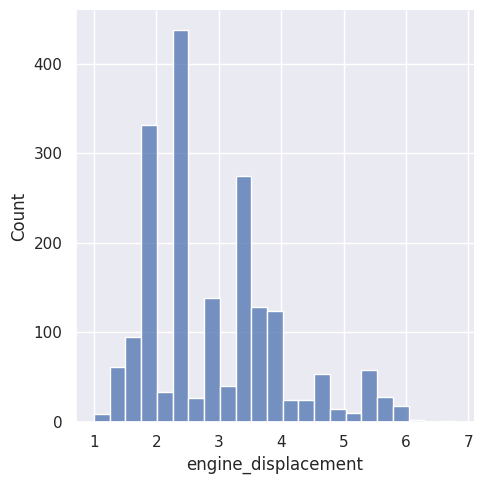

In [42]:
sns.set_theme()
ax=sns.displot(cars_df['engine_displacement'])

In [46]:
ax.

AttributeError: 'numpy.ndarray' object has no attribute 'set_xticks'